# Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

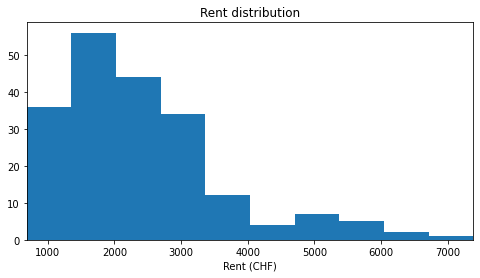

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

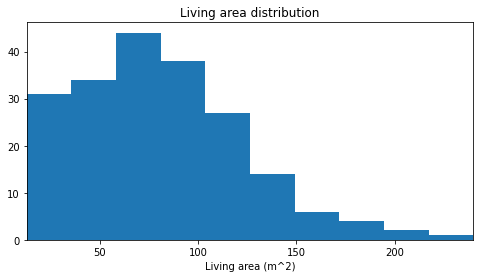

In [7]:
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living area (m^2)")
plt.title("Living area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

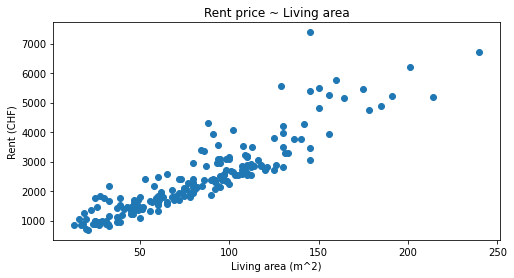

In [8]:
plt.figure(1, figsize=(8, 4))
plt.scatter(living_area, rent_price)
plt.xlabel("Living area (m^2)")
plt.ylabel("Rent (CHF)")
plt.title("Rent price ~ Living area")
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

[240.07710727  26.33242457]


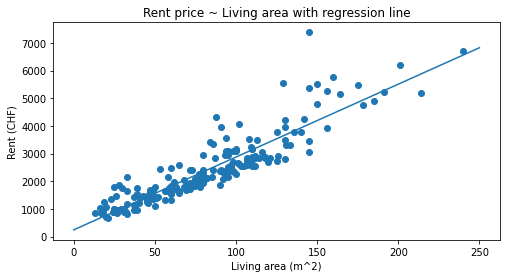

In [9]:
X = np.ones((len(living_area), 2))
X[:,1] = living_area
y = rent_price
theta = inv(np.dot(X.T, X)).dot(X.T).dot(y)
print(theta)

plt.figure(1, figsize=(8, 4))
plt.scatter(living_area, rent_price)
plt.xlabel("Living area (m^2)")
plt.ylabel("Rent (CHF)")
plt.title("Rent price ~ Living area with regression line")
x = np.linspace(0,250)
plt.plot(x, x * theta[1] + theta[0])
plt.show()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [10]:
mse = np.power((X.dot(theta))-y, 2).sum() / (2*len(living_area))
print(mse)

138034.95779787414


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

In [11]:
import torch

area = torch.from_numpy(living_area)
y = rent_price
p1d = torch.ones(len(living_area))
X = torch.stack((p1d,area),1).to(torch.double)
y = torch.from_numpy(y).to(torch.double)

theta = torch.inverse(torch.transpose(X,0,1)@X)@torch.transpose(X,0,1)@y
print(theta)

tensor([240.0771,  26.3324], dtype=torch.float64)


In [12]:
mse = ((((X@(theta))-y)**2).sum()) / (2*len(living_area))
print(mse)

tensor(138034.9578, dtype=torch.float64)
